# Разведочный анализ и предобработка данных
Выполнение заданий: загрузка, очистка, визуализация, заполнение пропусков и анализ.

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Настройки внешнего вида графиков
sns.set_style('darkgrid')

In [2]:
# Загрузка данных
df = pd.read_csv('application_data.csv')
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [3]:
# Удаляем столбцы с пропусками более 40%
threshold = 0.4
missing_ratio = df.isnull().mean()
cols_to_drop = missing_ratio[missing_ratio > threshold].index
df.drop(columns=cols_to_drop, inplace=True)
print(f"Удалены столбцы: {list(cols_to_drop)}")

Удалены столбцы: ['OWN_CAR_AGE', 'EXT_SOURCE_1', 'APARTMENTS_AVG', 'BASEMENTAREA_AVG', 'YEARS_BEGINEXPLUATATION_AVG', 'YEARS_BUILD_AVG', 'COMMONAREA_AVG', 'ELEVATORS_AVG', 'ENTRANCES_AVG', 'FLOORSMAX_AVG', 'FLOORSMIN_AVG', 'LANDAREA_AVG', 'LIVINGAPARTMENTS_AVG', 'LIVINGAREA_AVG', 'NONLIVINGAPARTMENTS_AVG', 'NONLIVINGAREA_AVG', 'APARTMENTS_MODE', 'BASEMENTAREA_MODE', 'YEARS_BEGINEXPLUATATION_MODE', 'YEARS_BUILD_MODE', 'COMMONAREA_MODE', 'ELEVATORS_MODE', 'ENTRANCES_MODE', 'FLOORSMAX_MODE', 'FLOORSMIN_MODE', 'LANDAREA_MODE', 'LIVINGAPARTMENTS_MODE', 'LIVINGAREA_MODE', 'NONLIVINGAPARTMENTS_MODE', 'NONLIVINGAREA_MODE', 'APARTMENTS_MEDI', 'BASEMENTAREA_MEDI', 'YEARS_BEGINEXPLUATATION_MEDI', 'YEARS_BUILD_MEDI', 'COMMONAREA_MEDI', 'ELEVATORS_MEDI', 'ENTRANCES_MEDI', 'FLOORSMAX_MEDI', 'FLOORSMIN_MEDI', 'LANDAREA_MEDI', 'LIVINGAPARTMENTS_MEDI', 'LIVINGAREA_MEDI', 'NONLIVINGAPARTMENTS_MEDI', 'NONLIVINGAREA_MEDI', 'FONDKAPREMONT_MODE', 'HOUSETYPE_MODE', 'TOTALAREA_MODE', 'WALLSMATERIAL_MODE', 'EM

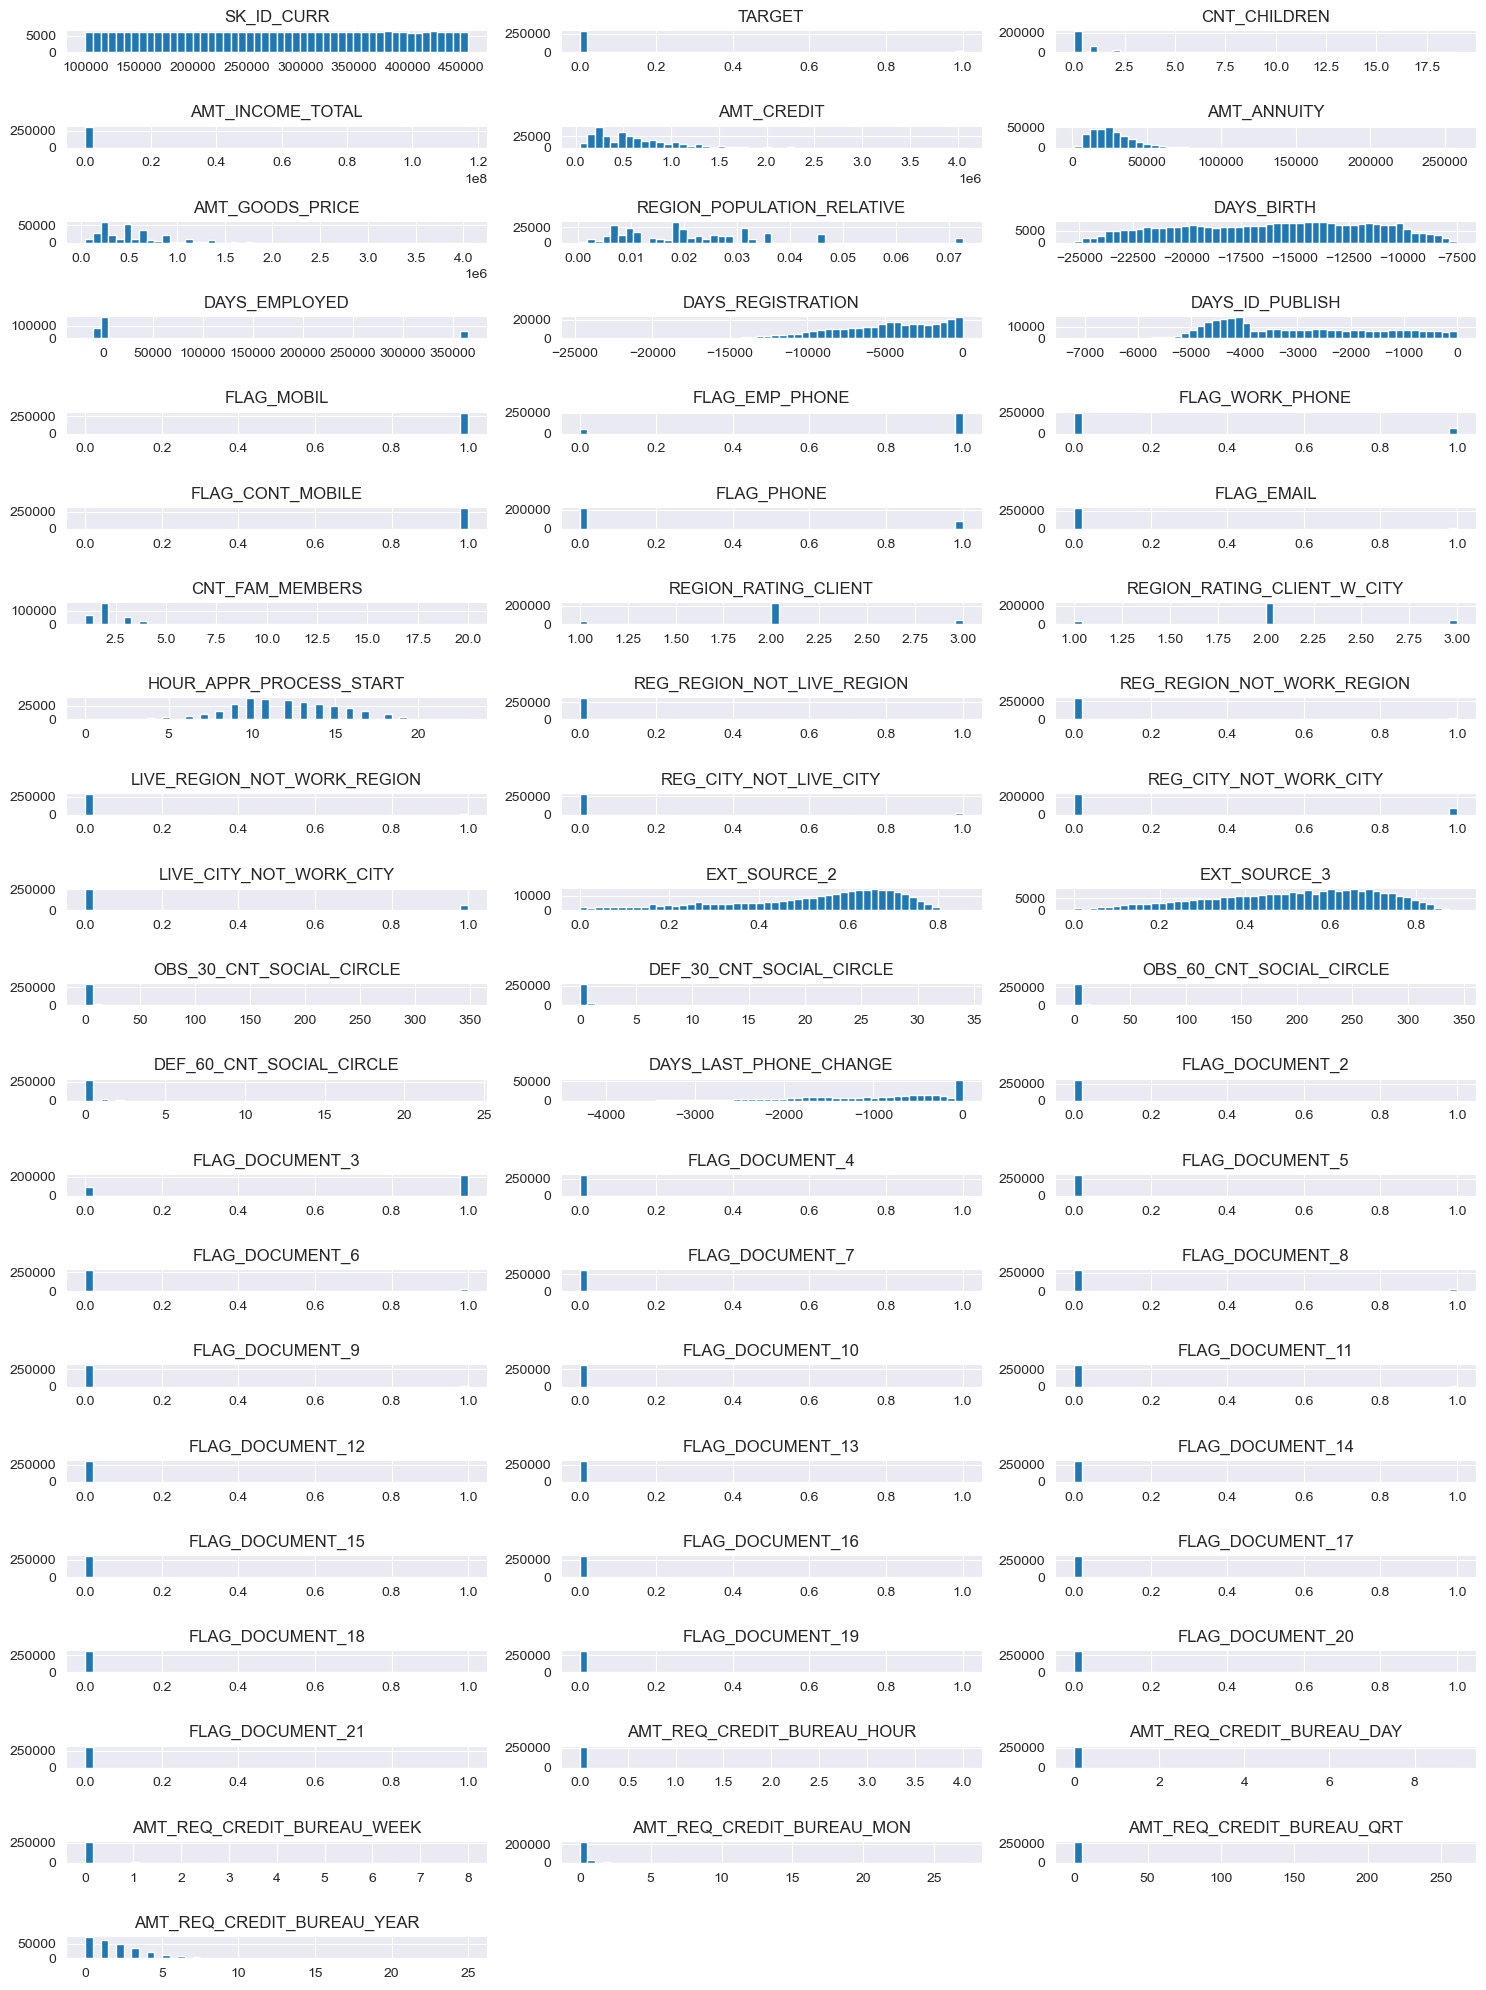

In [4]:
# Визуализация всех числовых столбцов гистограммами
num_cols = df.select_dtypes(include=['number']).columns
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3+1, 3, i)
    df[col].hist(bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

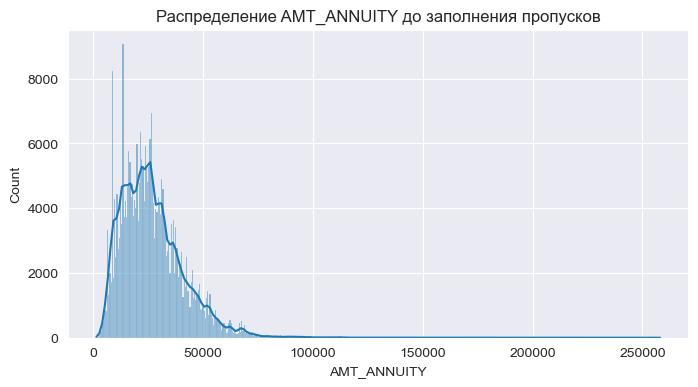

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_ANNUITY модой


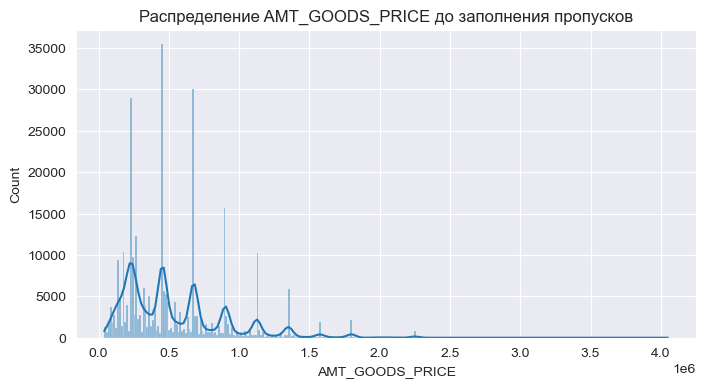

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_GOODS_PRICE модой


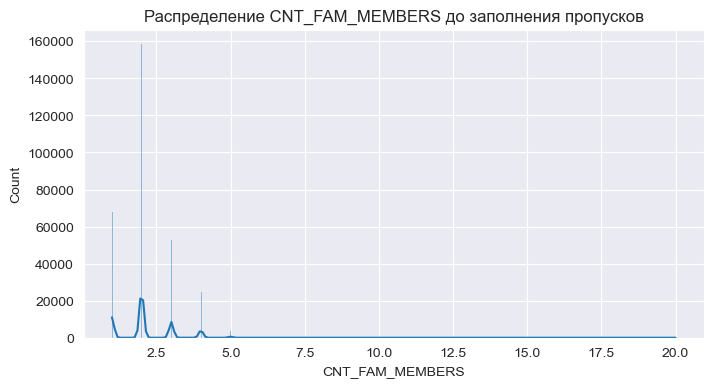

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Заполнены пропуски в CNT_FAM_MEMBERS средним значением


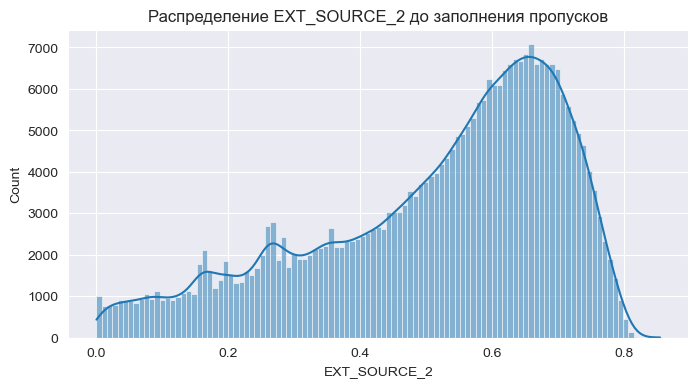

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Заполнены пропуски в EXT_SOURCE_2 средним значением


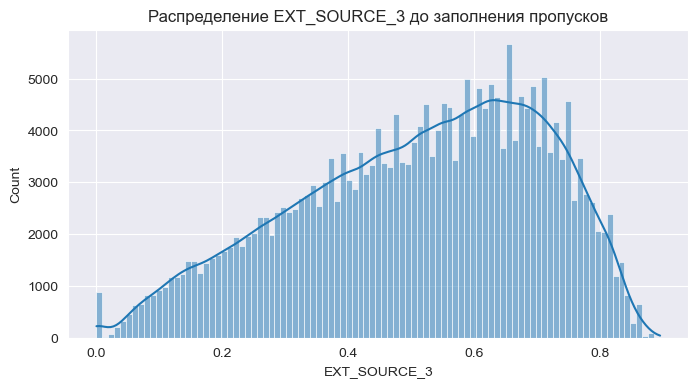

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Заполнены пропуски в EXT_SOURCE_3 средним значением


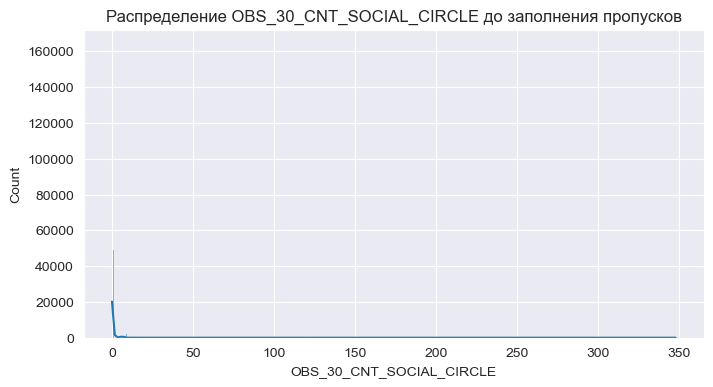

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в OBS_30_CNT_SOCIAL_CIRCLE модой


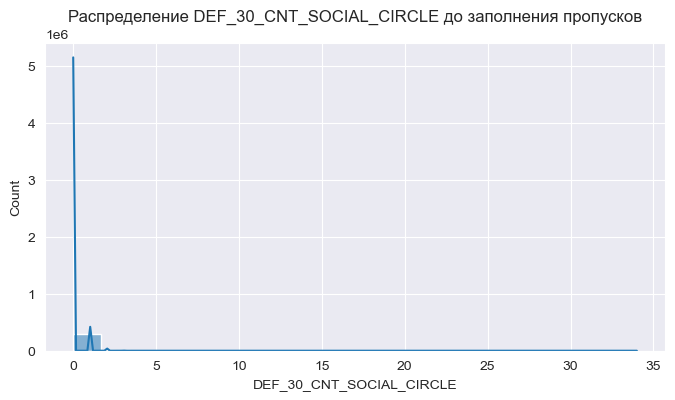

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в DEF_30_CNT_SOCIAL_CIRCLE модой


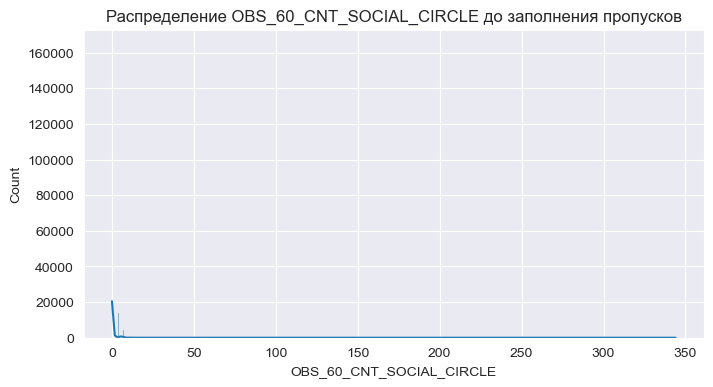

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в OBS_60_CNT_SOCIAL_CIRCLE модой


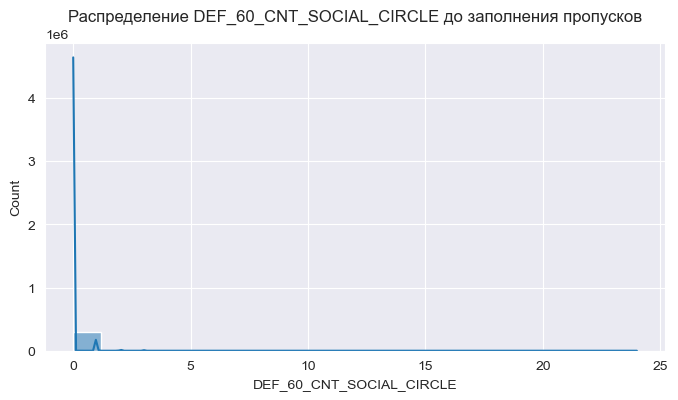

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в DEF_60_CNT_SOCIAL_CIRCLE модой


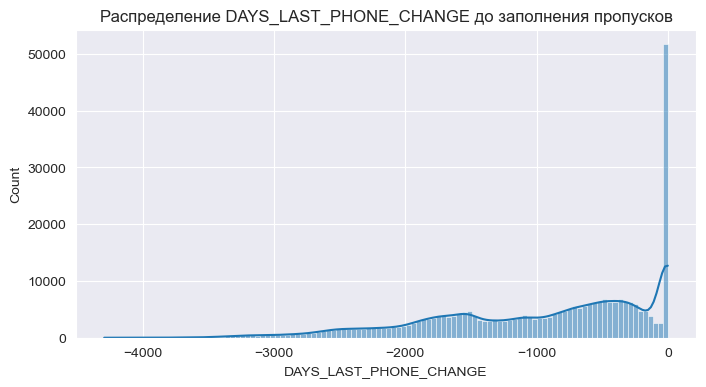

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:13: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mean(), inplace=True)


Заполнены пропуски в DAYS_LAST_PHONE_CHANGE средним значением


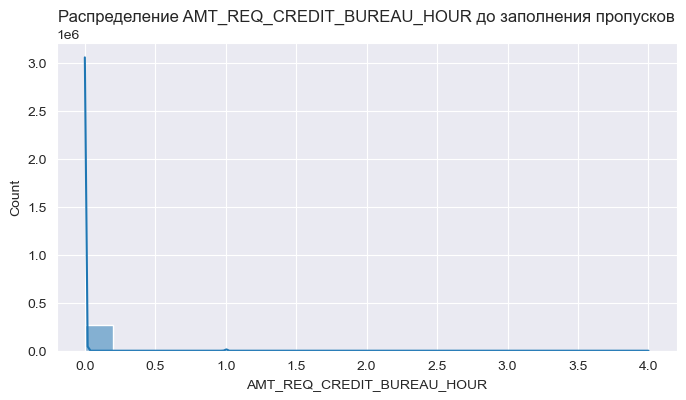

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_HOUR модой


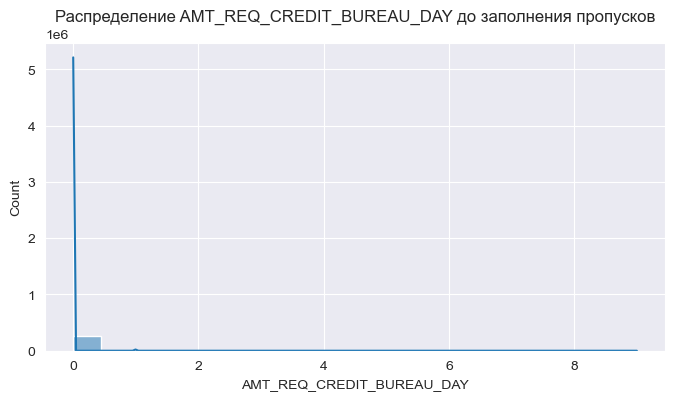

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_DAY модой


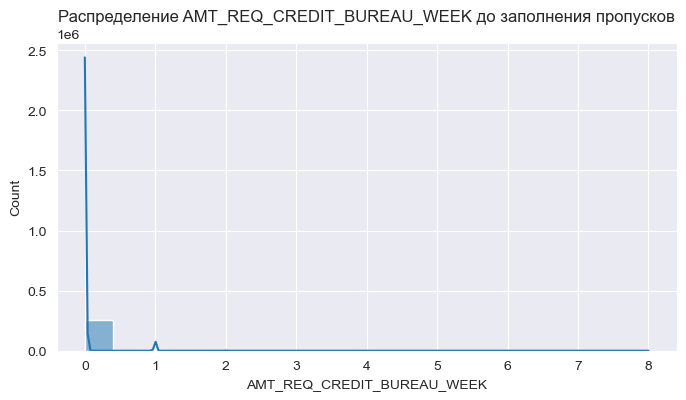

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_WEEK модой


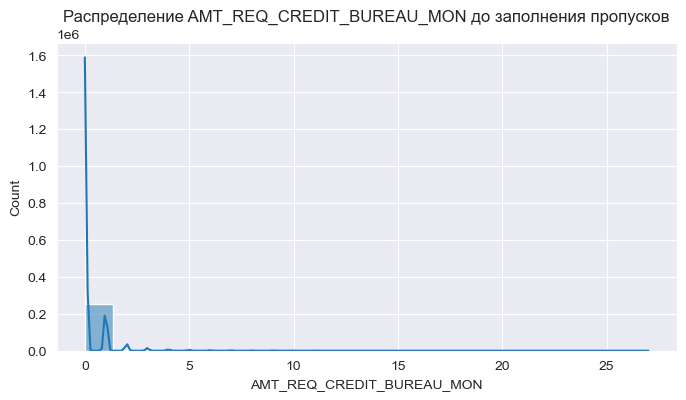

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_MON модой


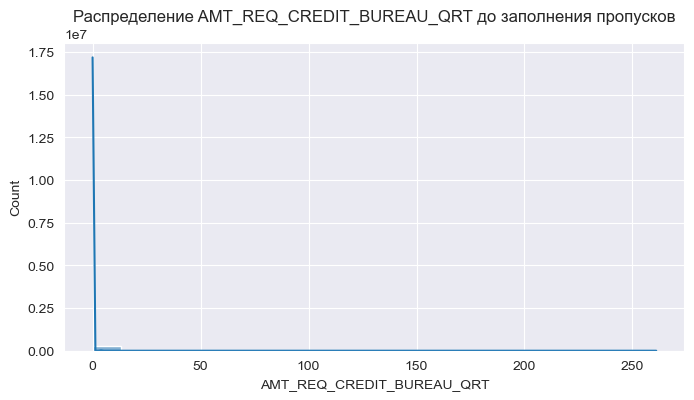

C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_QRT модой


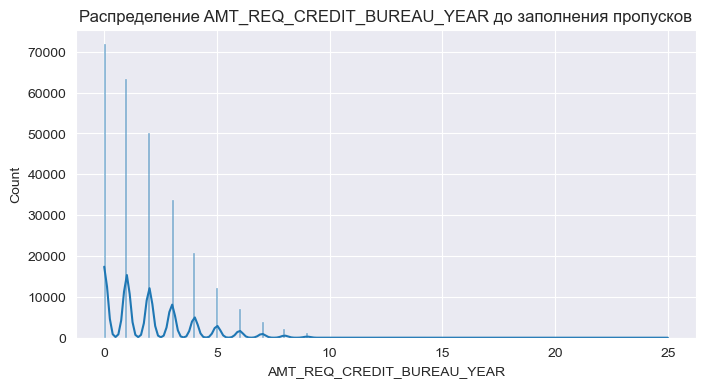

Заполнены пропуски в AMT_REQ_CREDIT_BUREAU_YEAR модой


C:\Users\danle\AppData\Local\Temp\ipykernel_16640\3866863474.py:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [5]:
# Обработка пропусков в числовых столбцах
import seaborn as sns

for col in num_cols:
    if df[col].isnull().sum() > 0:
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], kde=True)
        plt.title(f"Распределение {col} до заполнения пропусков")
        plt.show()
        
        # Заполнение пропусков в зависимости от распределения
        if df[col].skew() < 1:  # приближенно симметричное распределение
            df[col].fillna(df[col].mean(), inplace=True)
            print(f"Заполнены пропуски в {col} средним значением")
        else:
            df[col].fillna(df[col].mode()[0], inplace=True)
            print(f"Заполнены пропуски в {col} модой")

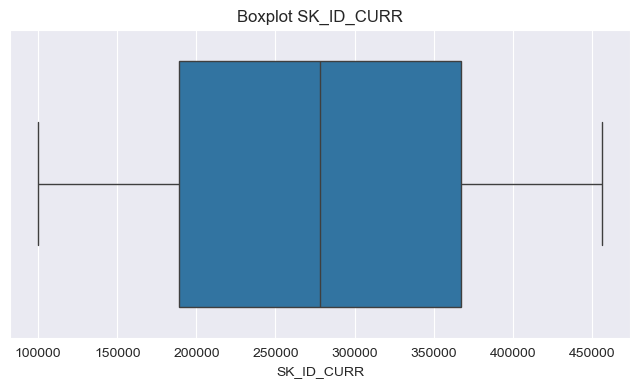

Обработаны выбросы в столбце SK_ID_CURR


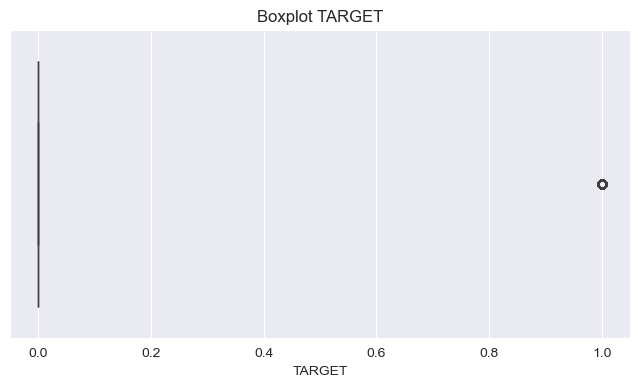

Обработаны выбросы в столбце TARGET


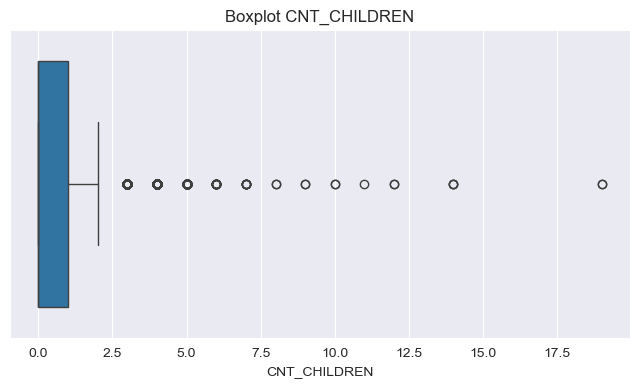

Обработаны выбросы в столбце CNT_CHILDREN


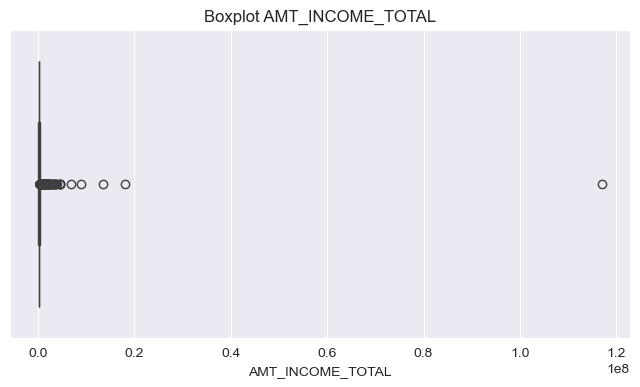

Обработаны выбросы в столбце AMT_INCOME_TOTAL


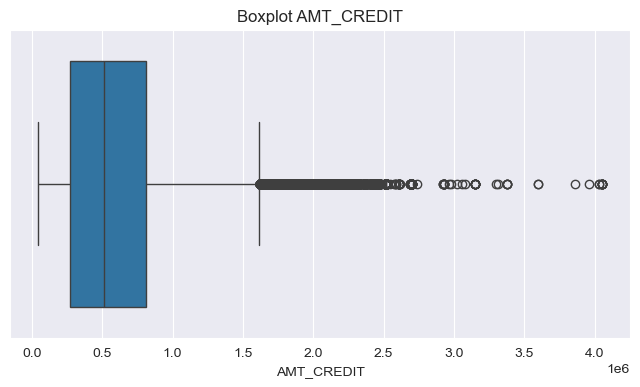

Обработаны выбросы в столбце AMT_CREDIT


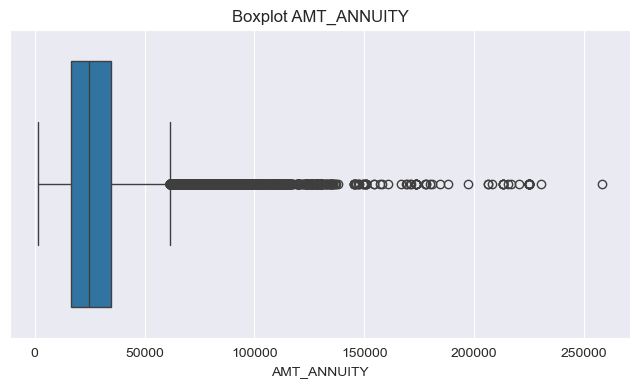

Обработаны выбросы в столбце AMT_ANNUITY


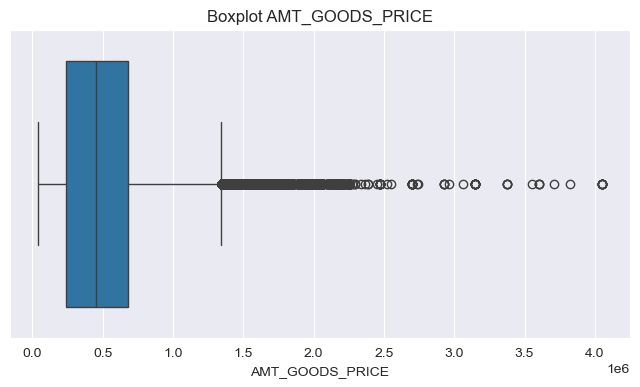

Обработаны выбросы в столбце AMT_GOODS_PRICE


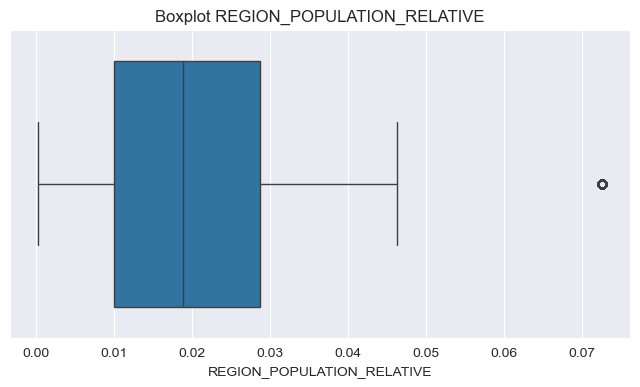

Обработаны выбросы в столбце REGION_POPULATION_RELATIVE


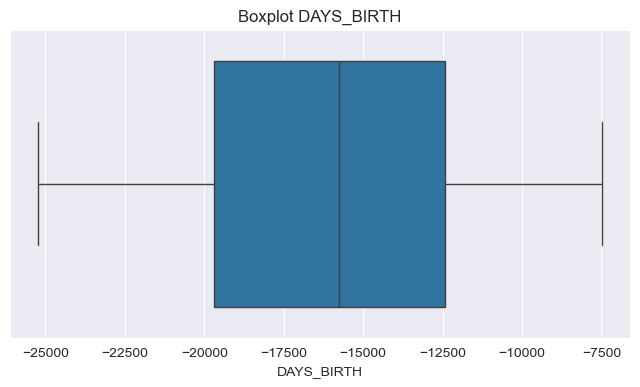

Обработаны выбросы в столбце DAYS_BIRTH


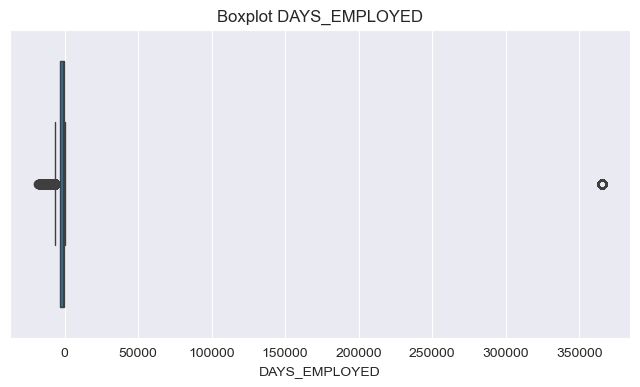

Обработаны выбросы в столбце DAYS_EMPLOYED


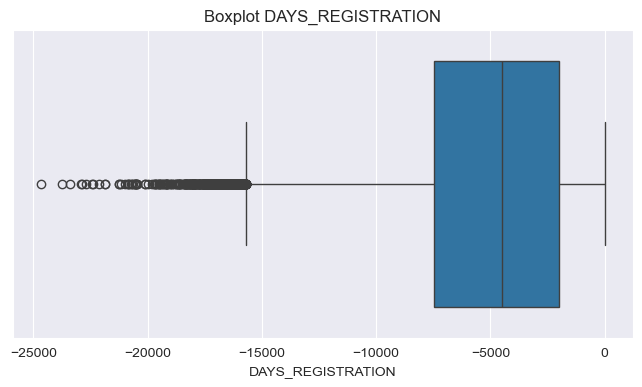

Обработаны выбросы в столбце DAYS_REGISTRATION


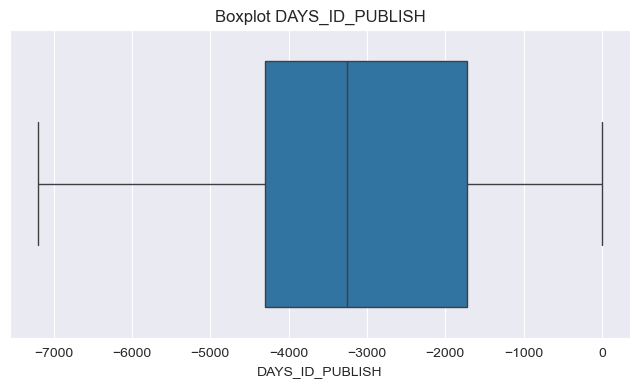

Обработаны выбросы в столбце DAYS_ID_PUBLISH


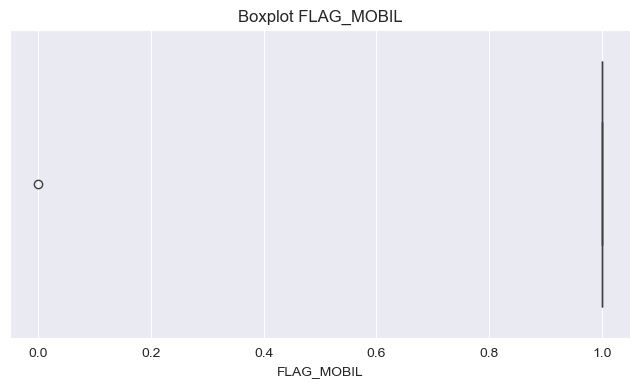

Обработаны выбросы в столбце FLAG_MOBIL


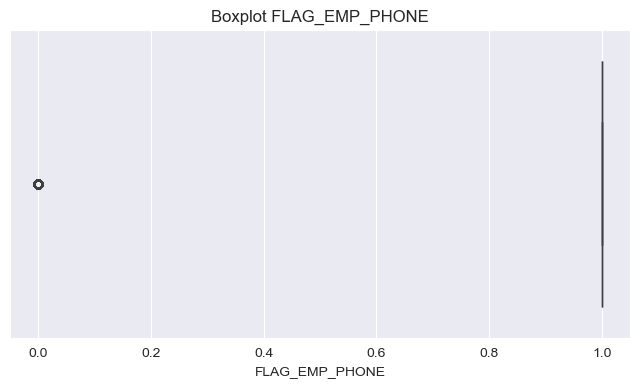

Обработаны выбросы в столбце FLAG_EMP_PHONE


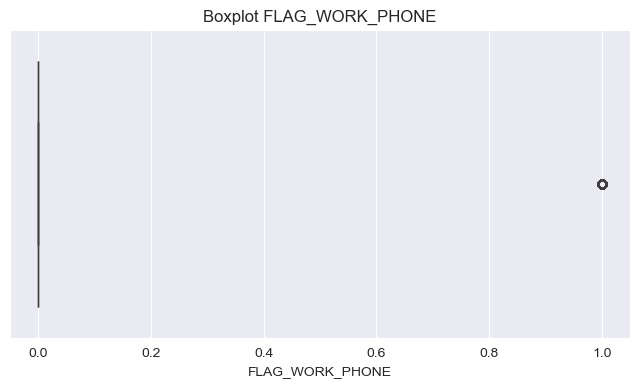

Обработаны выбросы в столбце FLAG_WORK_PHONE


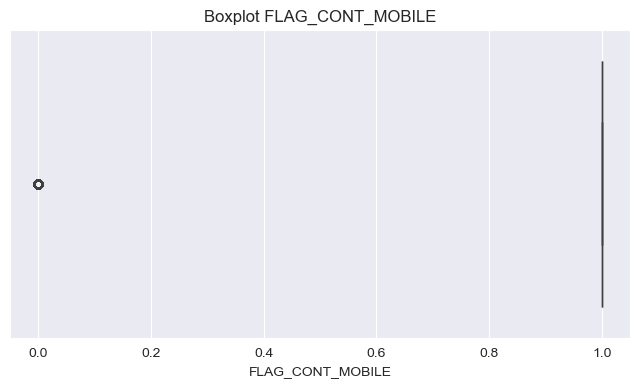

Обработаны выбросы в столбце FLAG_CONT_MOBILE


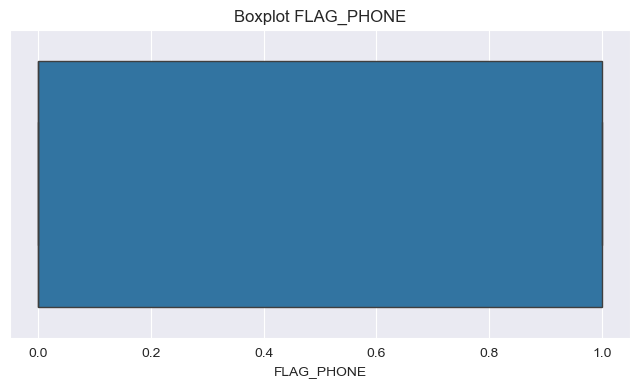

Обработаны выбросы в столбце FLAG_PHONE


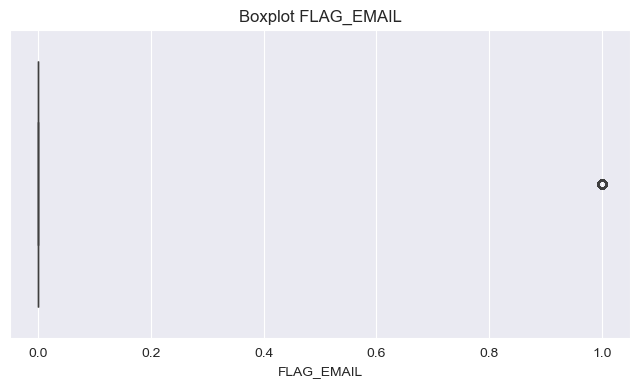

Обработаны выбросы в столбце FLAG_EMAIL


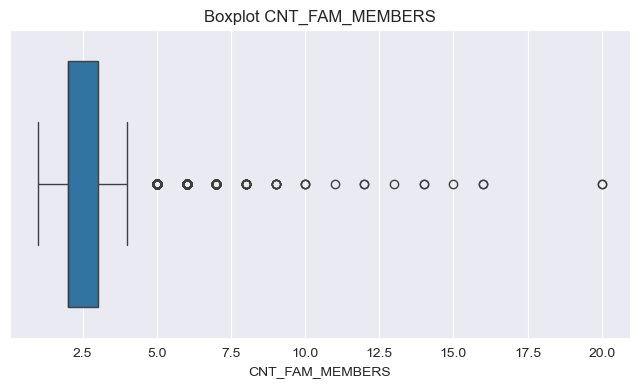

Обработаны выбросы в столбце CNT_FAM_MEMBERS


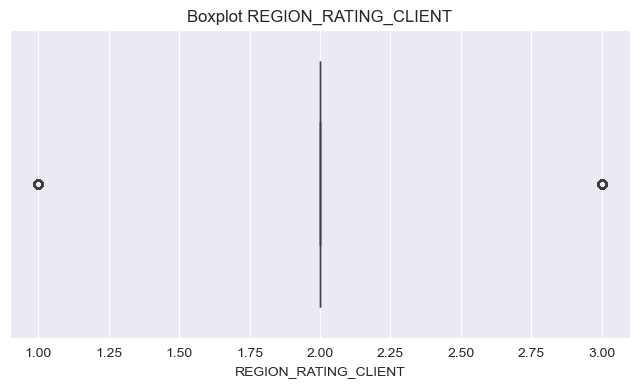

Обработаны выбросы в столбце REGION_RATING_CLIENT


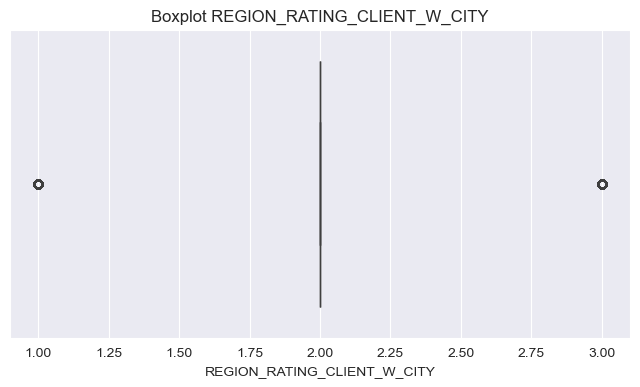

Обработаны выбросы в столбце REGION_RATING_CLIENT_W_CITY


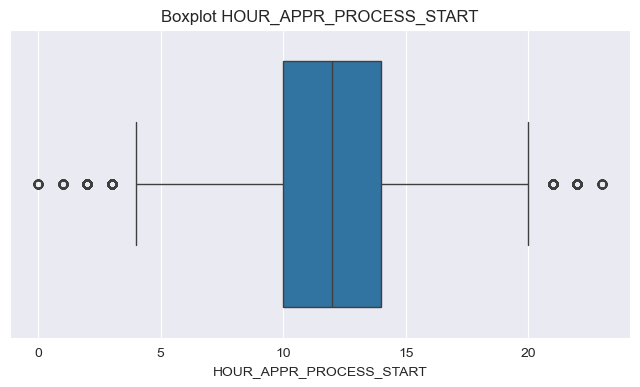

Обработаны выбросы в столбце HOUR_APPR_PROCESS_START


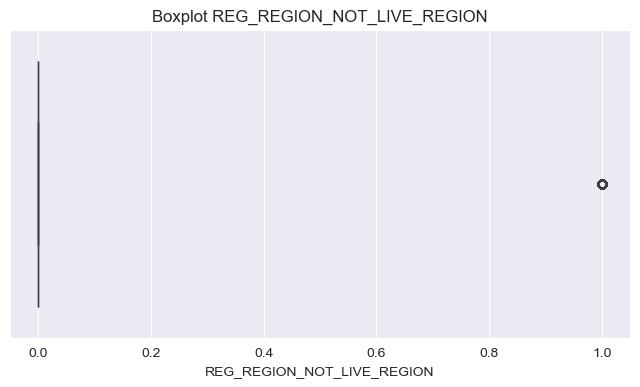

Обработаны выбросы в столбце REG_REGION_NOT_LIVE_REGION


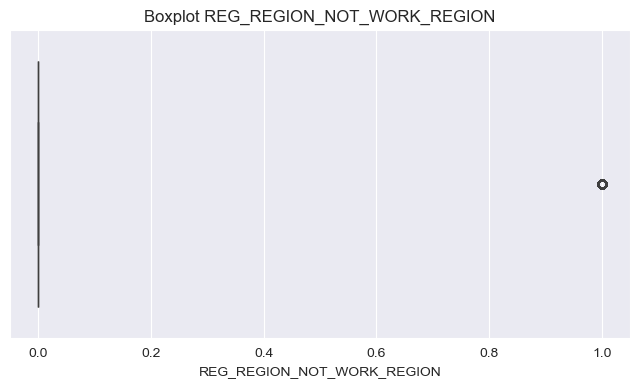

Обработаны выбросы в столбце REG_REGION_NOT_WORK_REGION


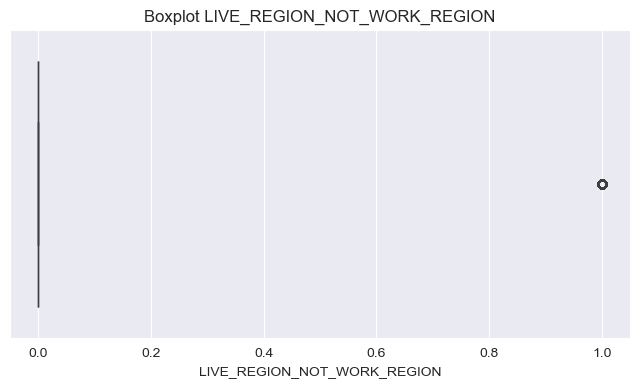

Обработаны выбросы в столбце LIVE_REGION_NOT_WORK_REGION


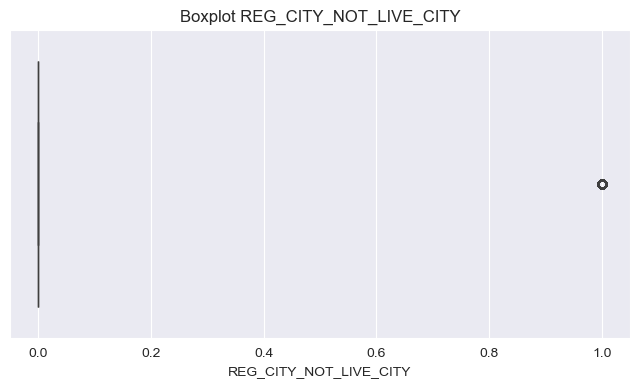

Обработаны выбросы в столбце REG_CITY_NOT_LIVE_CITY


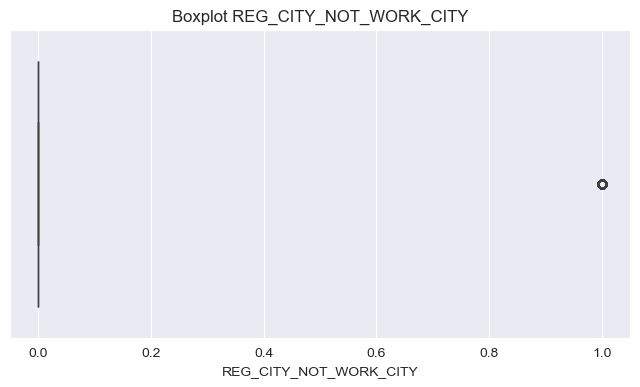

Обработаны выбросы в столбце REG_CITY_NOT_WORK_CITY


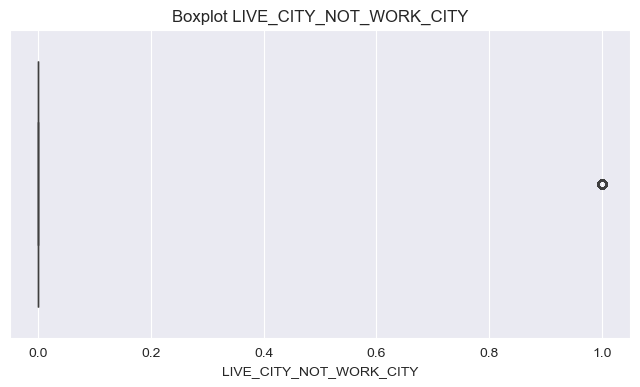

Обработаны выбросы в столбце LIVE_CITY_NOT_WORK_CITY


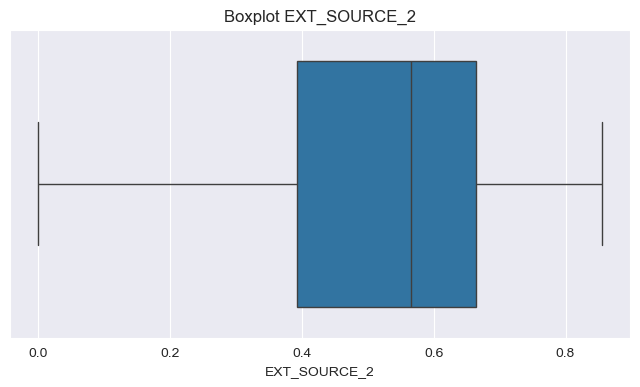

Обработаны выбросы в столбце EXT_SOURCE_2


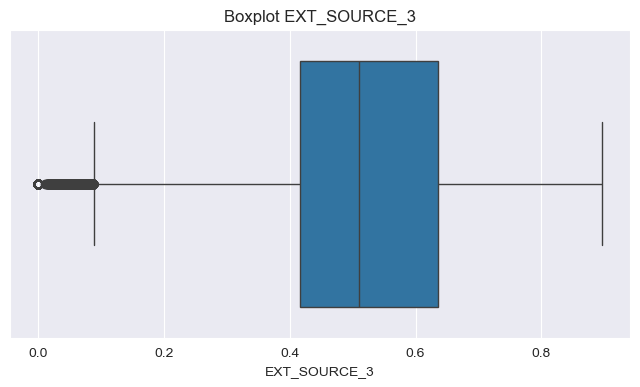

Обработаны выбросы в столбце EXT_SOURCE_3


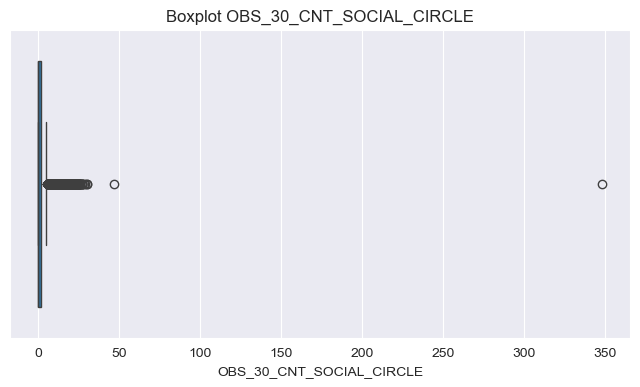

Обработаны выбросы в столбце OBS_30_CNT_SOCIAL_CIRCLE


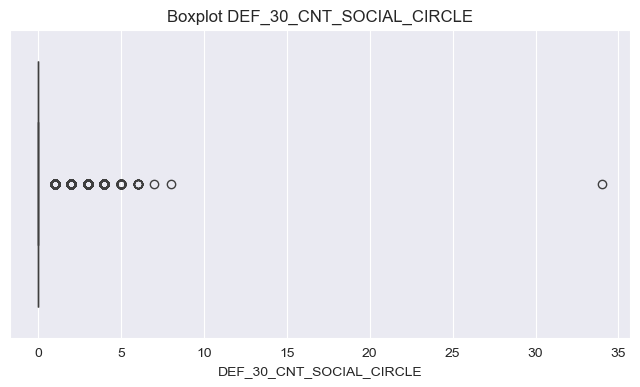

Обработаны выбросы в столбце DEF_30_CNT_SOCIAL_CIRCLE


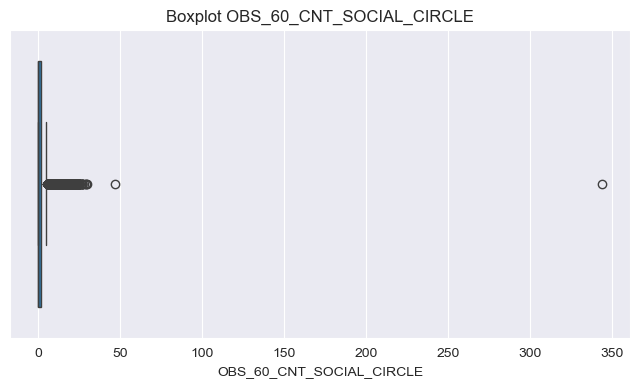

Обработаны выбросы в столбце OBS_60_CNT_SOCIAL_CIRCLE


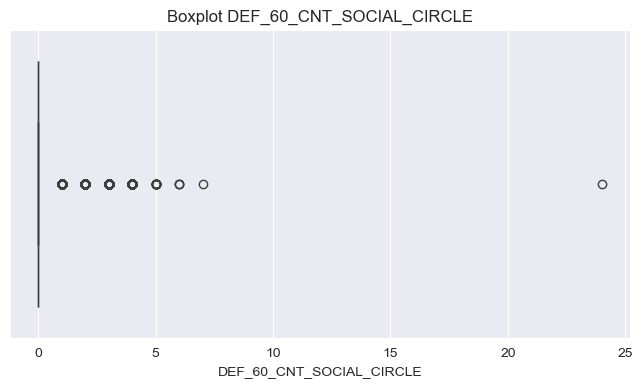

Обработаны выбросы в столбце DEF_60_CNT_SOCIAL_CIRCLE


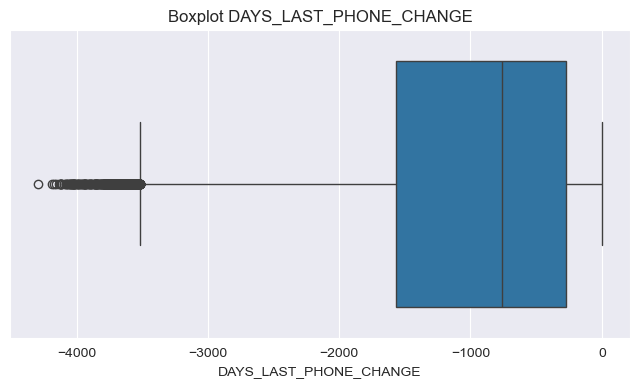

Обработаны выбросы в столбце DAYS_LAST_PHONE_CHANGE


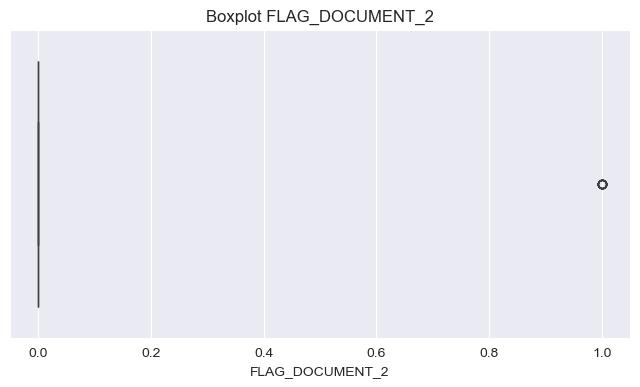

Обработаны выбросы в столбце FLAG_DOCUMENT_2


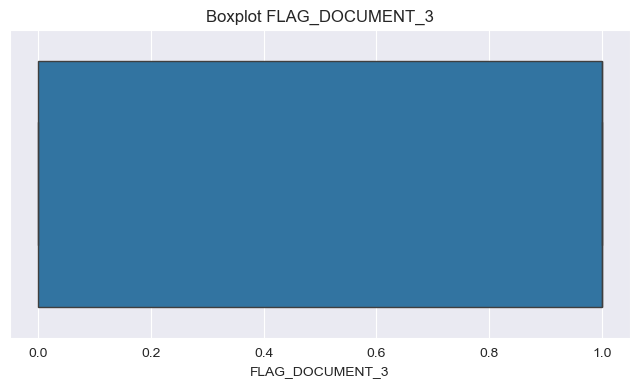

Обработаны выбросы в столбце FLAG_DOCUMENT_3


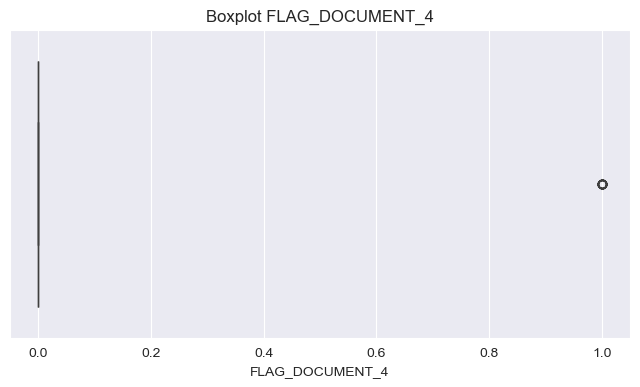

Обработаны выбросы в столбце FLAG_DOCUMENT_4


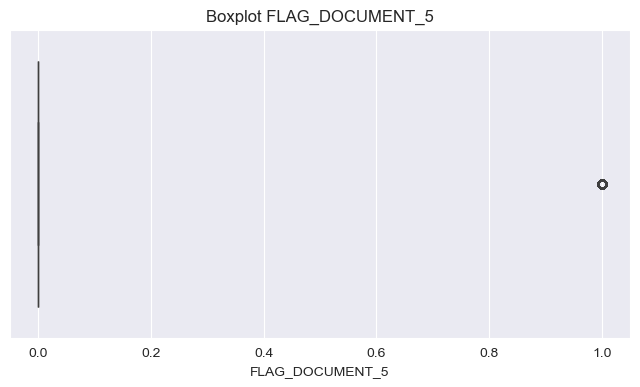

Обработаны выбросы в столбце FLAG_DOCUMENT_5


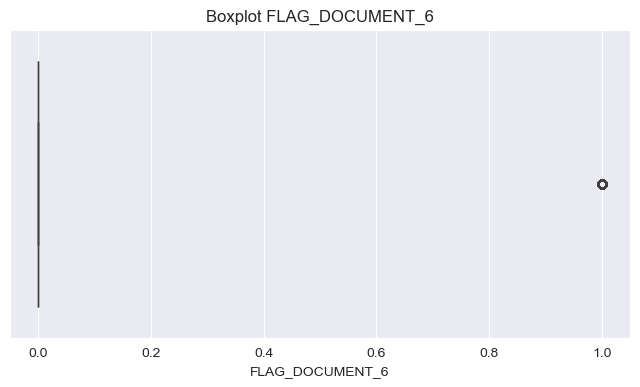

Обработаны выбросы в столбце FLAG_DOCUMENT_6


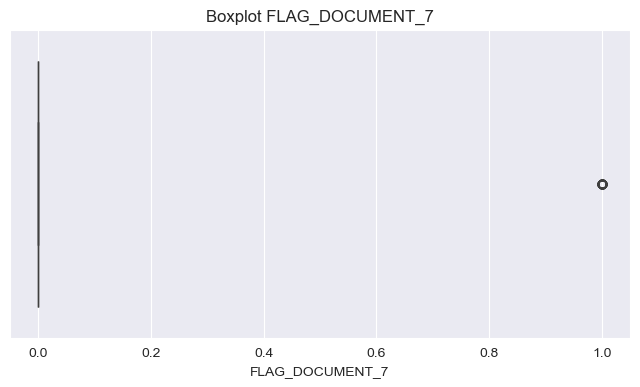

Обработаны выбросы в столбце FLAG_DOCUMENT_7


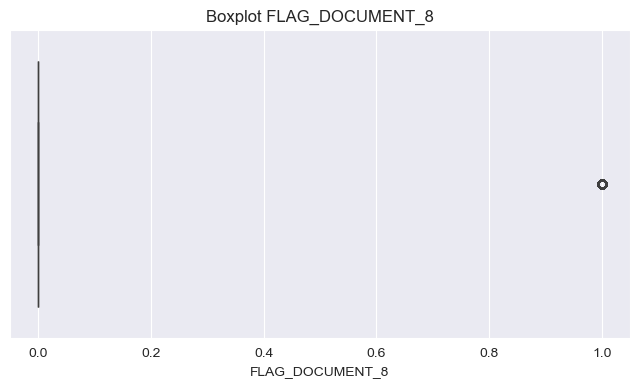

Обработаны выбросы в столбце FLAG_DOCUMENT_8


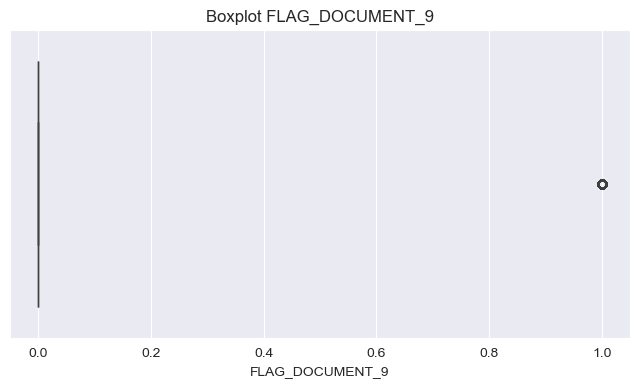

Обработаны выбросы в столбце FLAG_DOCUMENT_9


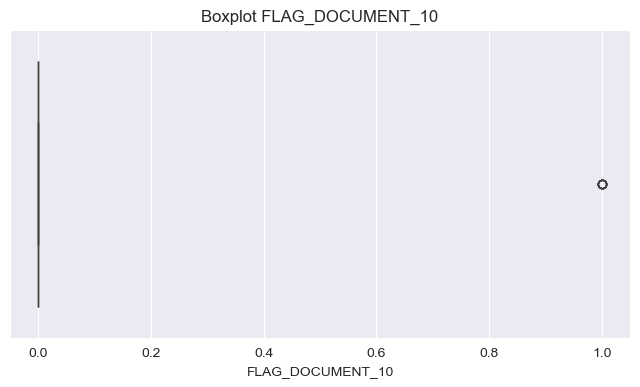

Обработаны выбросы в столбце FLAG_DOCUMENT_10


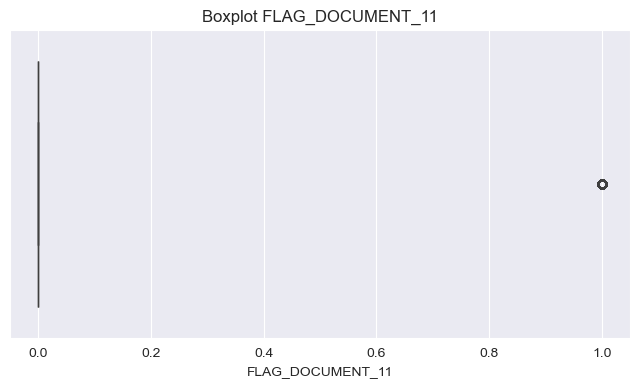

Обработаны выбросы в столбце FLAG_DOCUMENT_11


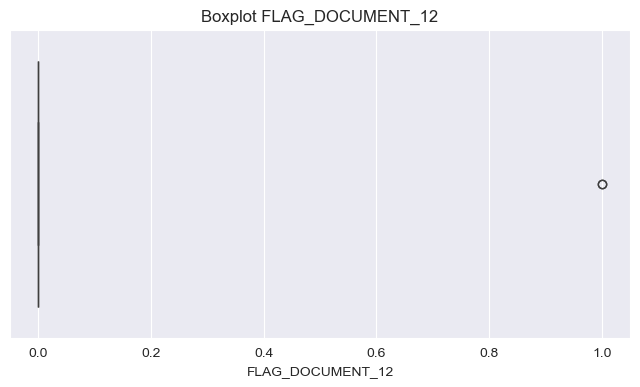

Обработаны выбросы в столбце FLAG_DOCUMENT_12


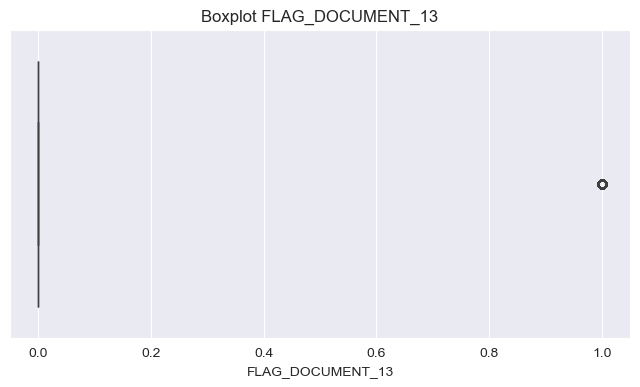

Обработаны выбросы в столбце FLAG_DOCUMENT_13


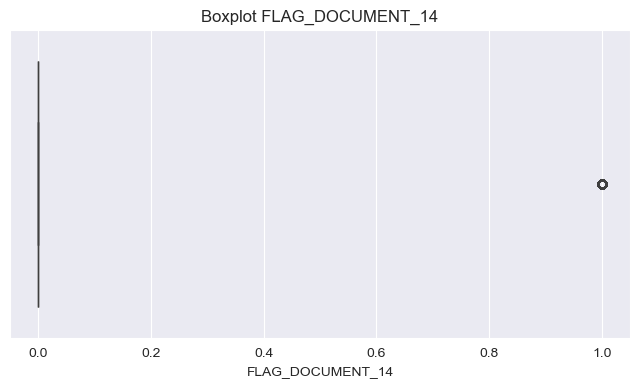

Обработаны выбросы в столбце FLAG_DOCUMENT_14


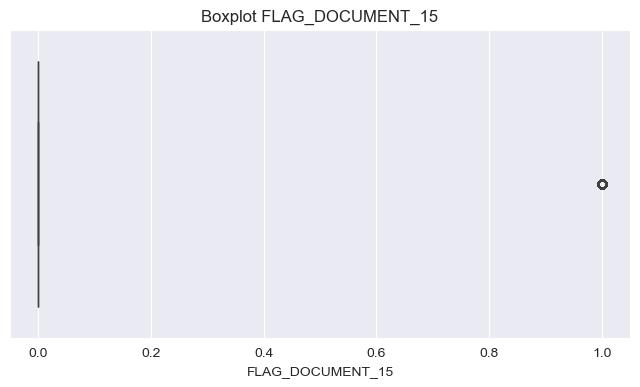

Обработаны выбросы в столбце FLAG_DOCUMENT_15


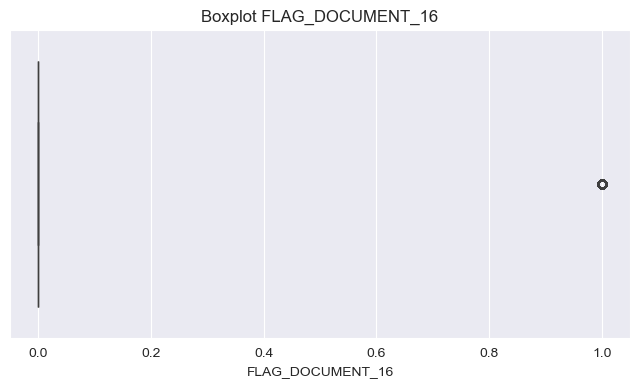

Обработаны выбросы в столбце FLAG_DOCUMENT_16


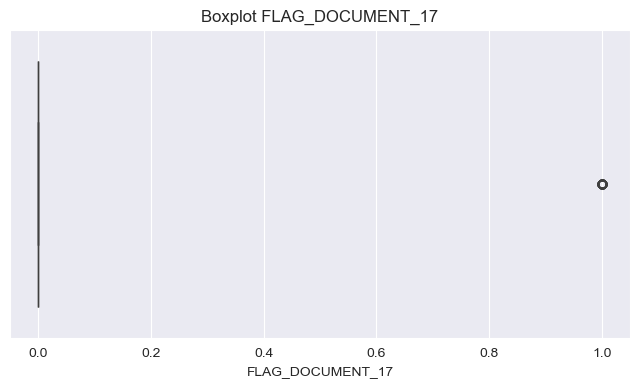

Обработаны выбросы в столбце FLAG_DOCUMENT_17


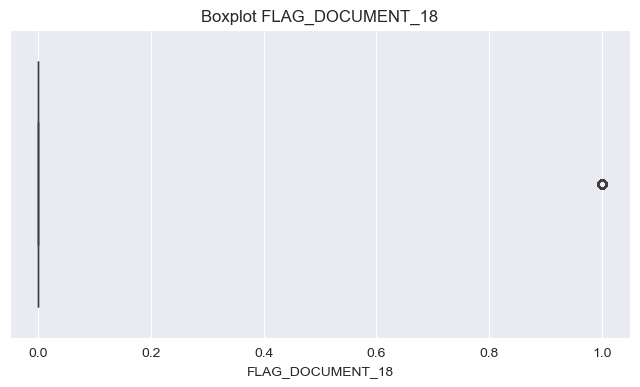

Обработаны выбросы в столбце FLAG_DOCUMENT_18


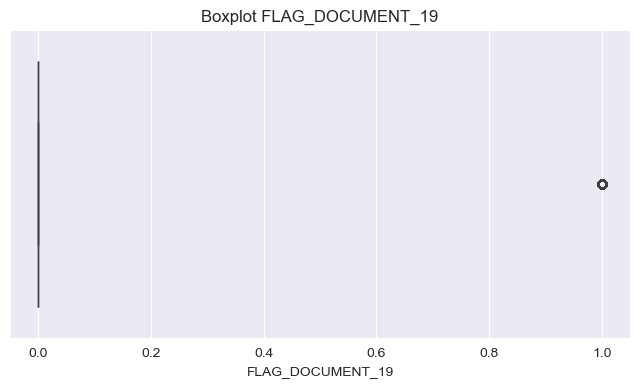

Обработаны выбросы в столбце FLAG_DOCUMENT_19


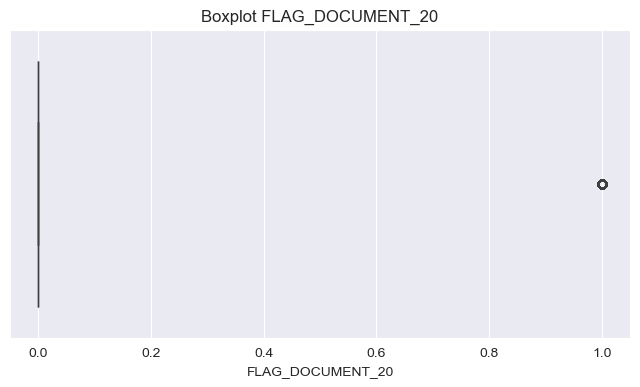

Обработаны выбросы в столбце FLAG_DOCUMENT_20


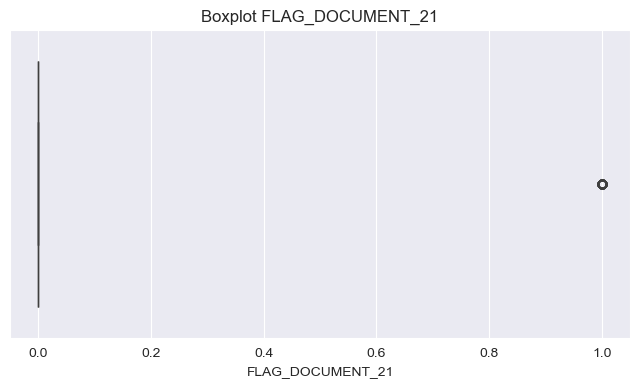

Обработаны выбросы в столбце FLAG_DOCUMENT_21


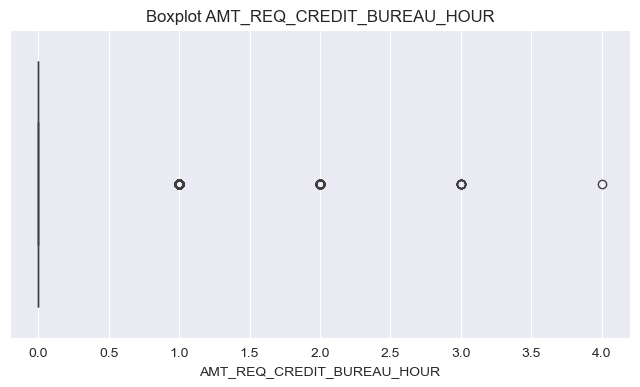

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_HOUR


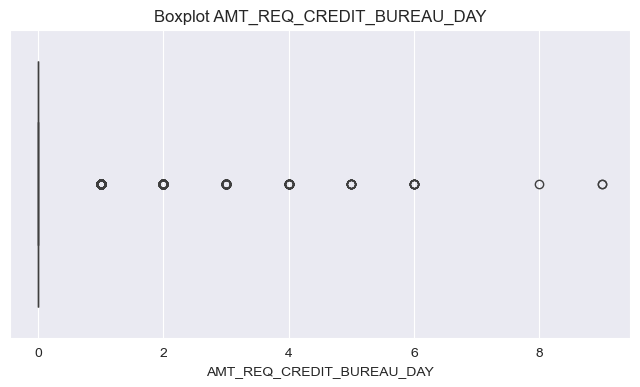

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_DAY


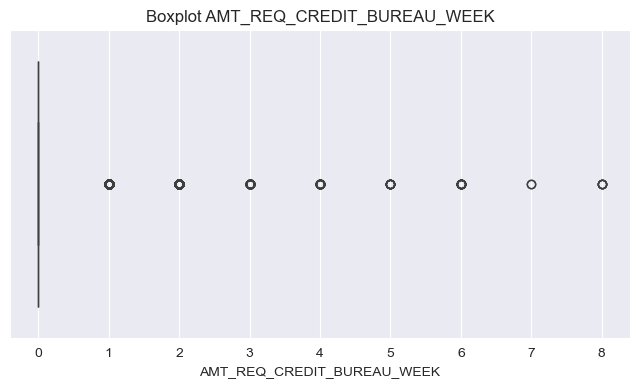

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_WEEK


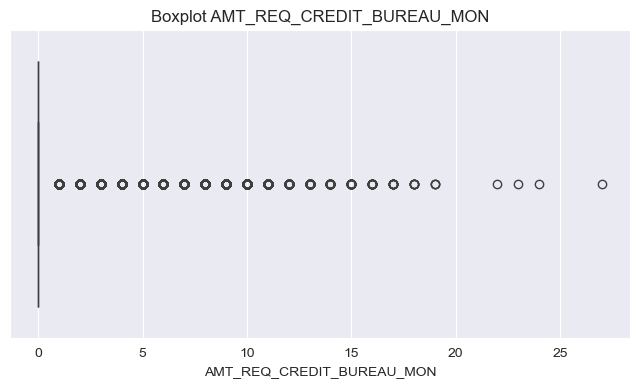

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_MON


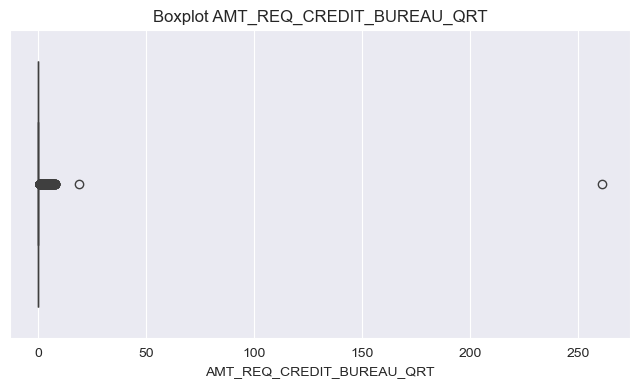

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_QRT


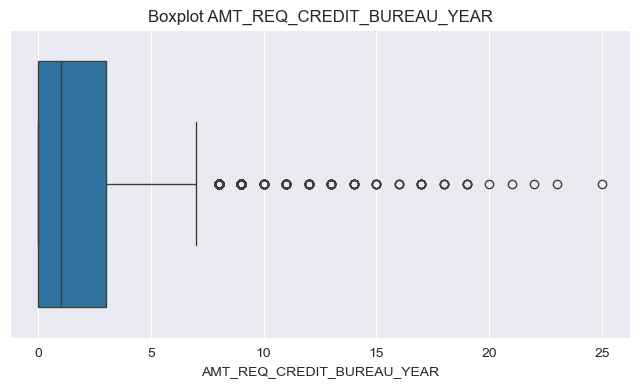

Обработаны выбросы в столбце AMT_REQ_CREDIT_BUREAU_YEAR


In [6]:
# Анализ аномалий и их обработка (пример для числовых столбцов)
for col in num_cols:
    plt.figure(figsize=(8,4))
    sns.boxplot(x=df[col])
    plt.title(f"Boxplot {col}")
    plt.show()
    
    # Обработка выбросов - пример с обрезанием на 1.5 интерквартильного размаха
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Ограничиваем выбросы пределами
    df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
    df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    print(f"Обработаны выбросы в столбце {col}")

In [7]:
# Анализ уникальных значений в столбцах типа object
obj_cols = df.select_dtypes(include=['object']).columns
for col in obj_cols:
    unique_vals = df[col].nunique()
    print(f"Столбец {col}: уникальных значений: {unique_vals}")
    print(f"Первые 10 уникальных значений: {df[col].unique()[:10]}\n")

Столбец NAME_CONTRACT_TYPE: уникальных значений: 2
Первые 10 уникальных значений: ['Cash loans' 'Revolving loans']

Столбец CODE_GENDER: уникальных значений: 3
Первые 10 уникальных значений: ['M' 'F' 'XNA']

Столбец FLAG_OWN_CAR: уникальных значений: 2
Первые 10 уникальных значений: ['N' 'Y']

Столбец FLAG_OWN_REALTY: уникальных значений: 2
Первые 10 уникальных значений: ['Y' 'N']

Столбец NAME_TYPE_SUITE: уникальных значений: 7
Первые 10 уникальных значений: ['Unaccompanied' 'Family' 'Spouse, partner' 'Children' 'Other_A' nan
 'Other_B' 'Group of people']

Столбец NAME_INCOME_TYPE: уникальных значений: 8
Первые 10 уникальных значений: ['Working' 'State servant' 'Commercial associate' 'Pensioner' 'Unemployed'
 'Student' 'Businessman' 'Maternity leave']

Столбец NAME_EDUCATION_TYPE: уникальных значений: 5
Первые 10 уникальных значений: ['Secondary / secondary special' 'Higher education' 'Incomplete higher'
 'Lower secondary' 'Academic degree']

Столбец NAME_FAMILY_STATUS: уникальных зна

In [8]:
# Специфическая обработка столбца OCCUPATION_TYPE (если есть)
if 'OCCUPATION_TYPE' in df.columns:
    print(f"Пропуски в OCCUPATION_TYPE: {df['OCCUPATION_TYPE'].isnull().sum()}")
    # Анализ связи пропусков с другими аномалиями можно дополнить здесь
    # Заполняем пропуски модой
    df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)
    print("Пропуски в OCCUPATION_TYPE заполнены модой")

Пропуски в OCCUPATION_TYPE: 96391
Пропуски в OCCUPATION_TYPE заполнены модой


C:\Users\danle\AppData\Local\Temp\ipykernel_16640\1465846652.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['OCCUPATION_TYPE'].fillna(df['OCCUPATION_TYPE'].mode()[0], inplace=True)


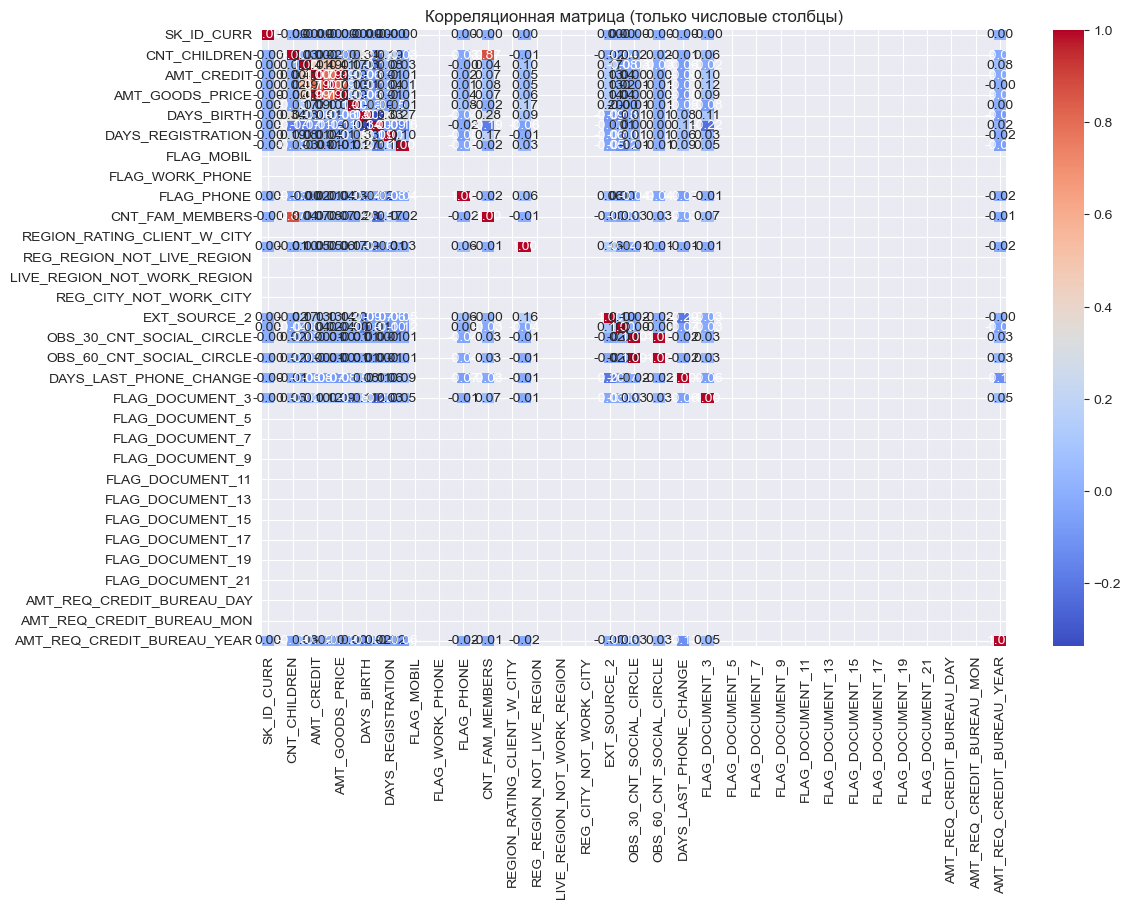

In [10]:
# Выбираем только числовые столбцы
num_cols = df.select_dtypes(include=['number']).columns

# Строим корреляционную матрицу по числовым столбцам только
corr_matrix = df[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Корреляционная матрица (только числовые столбцы)')
plt.show()


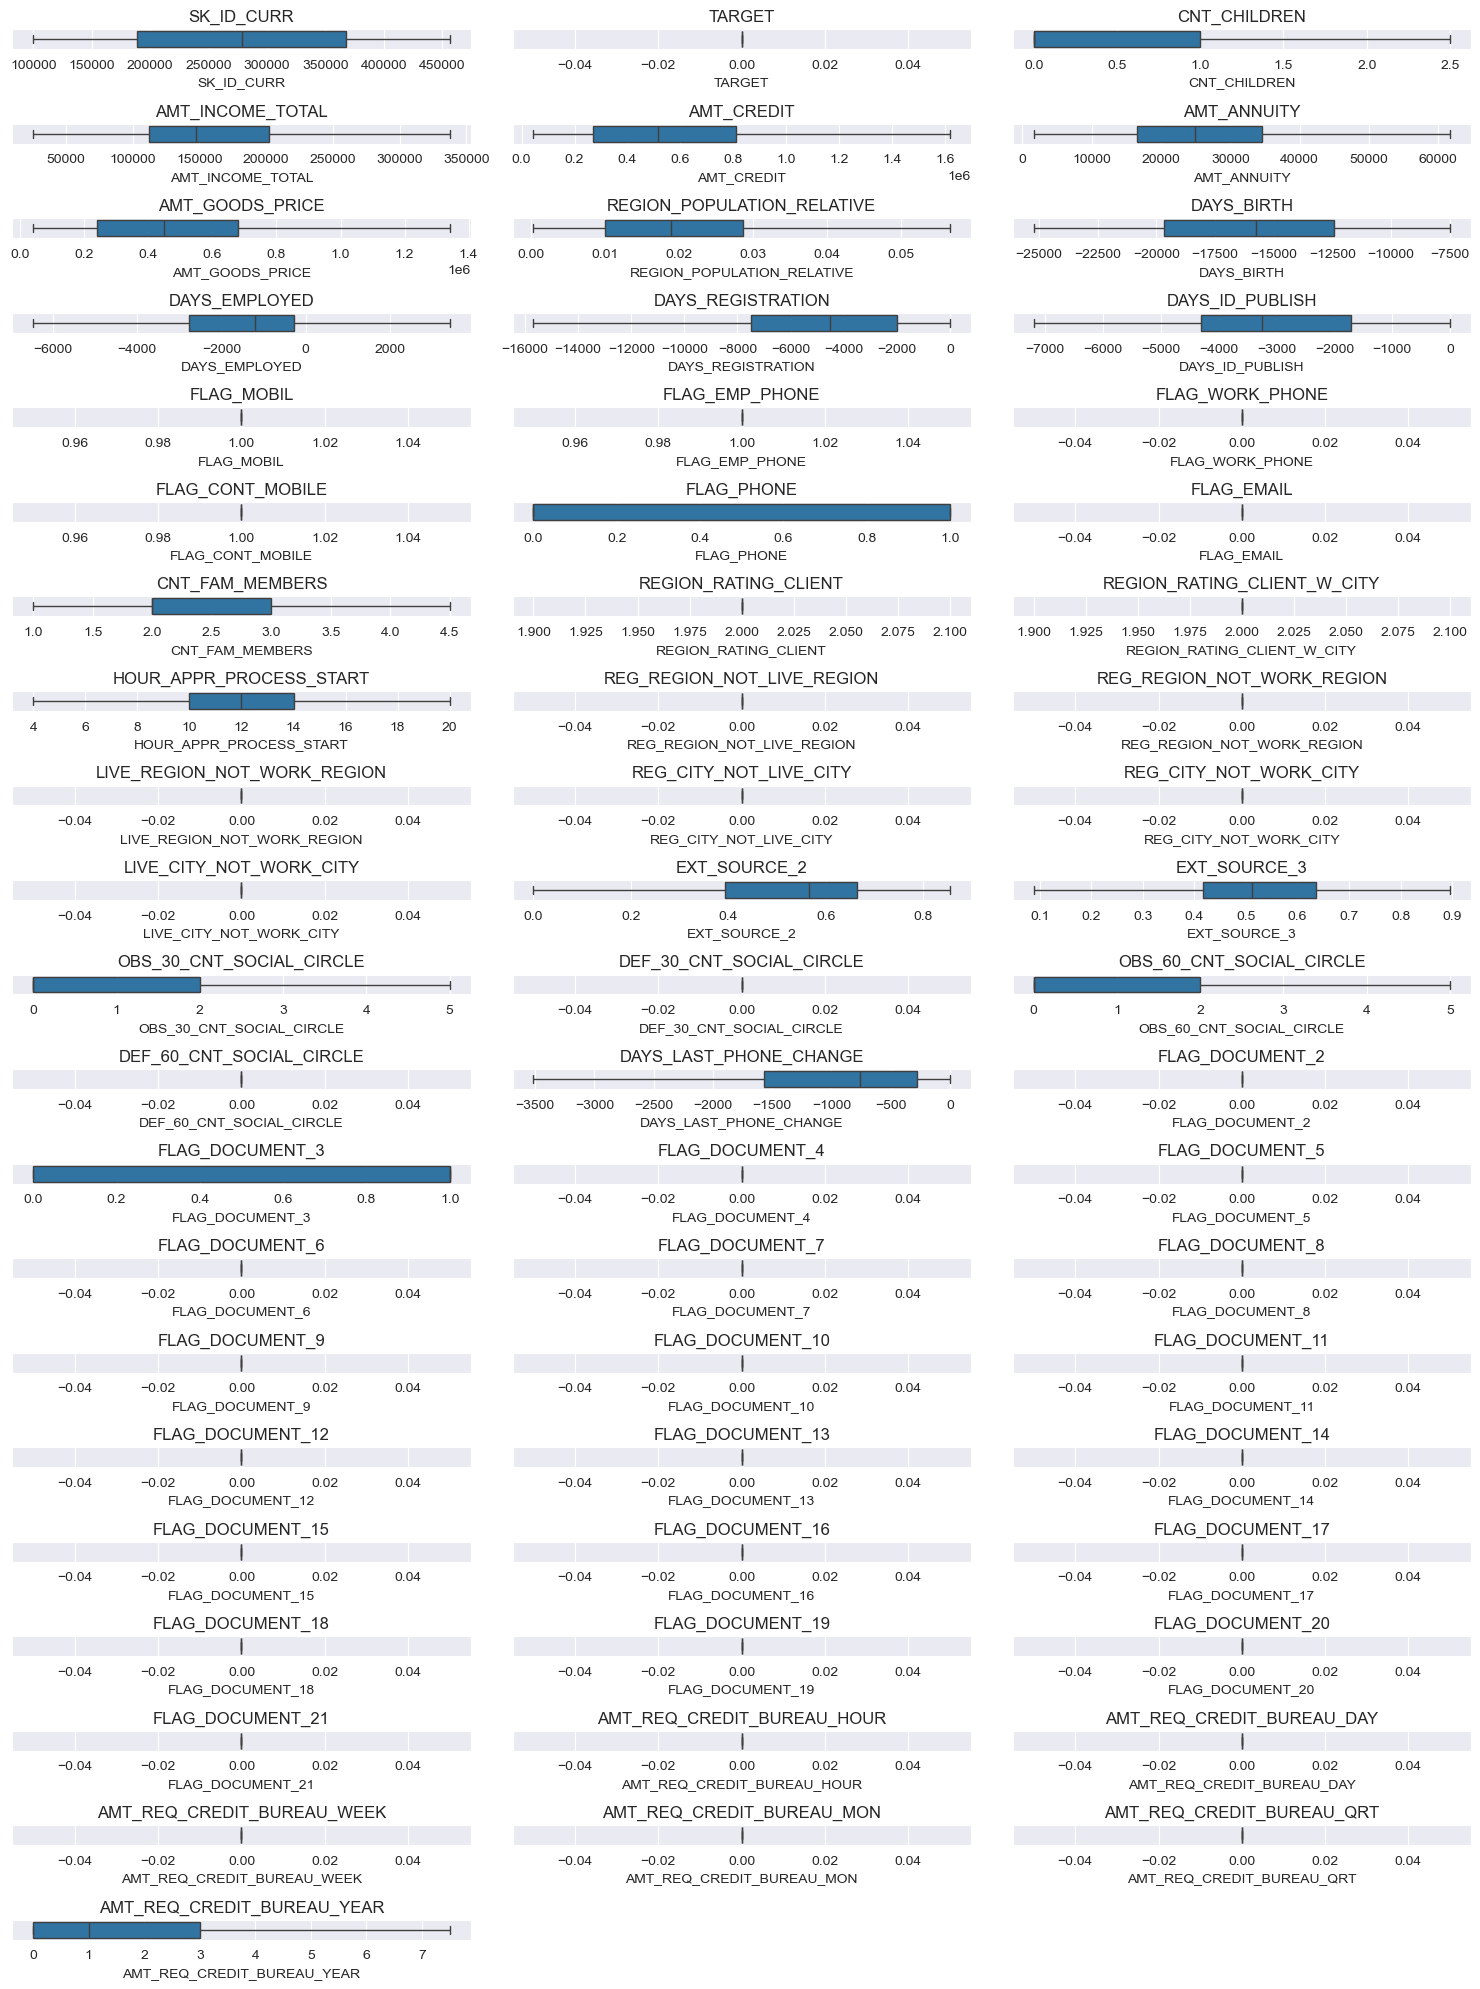

In [11]:
# Построение boxplot для числовых столбцов
plt.figure(figsize=(15, 20))
for i, col in enumerate(num_cols, 1):
    plt.subplot(len(num_cols)//3+1, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()

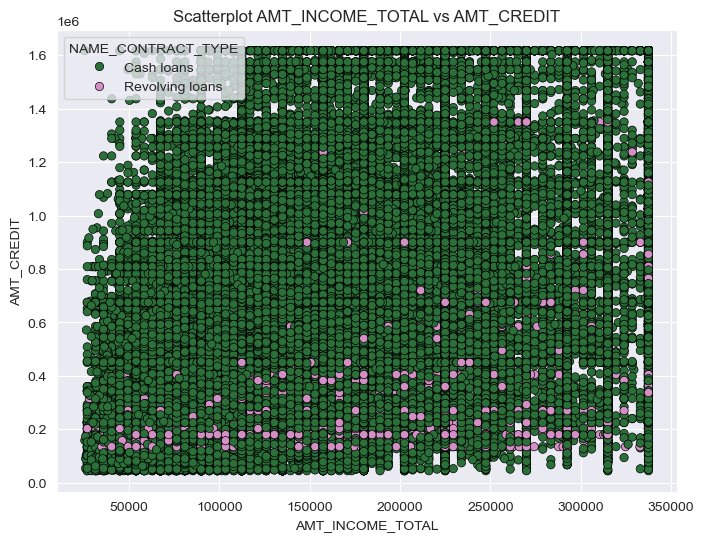

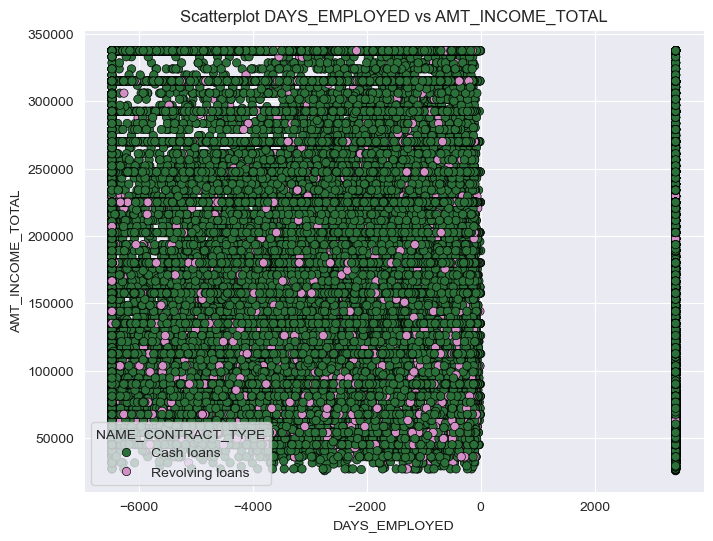

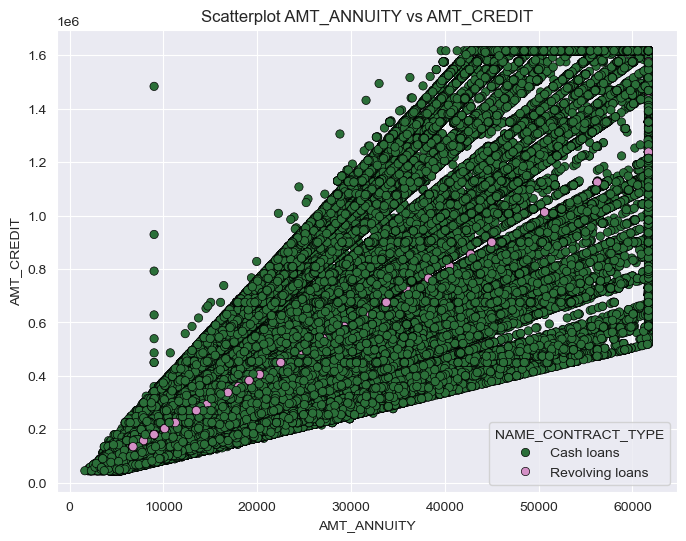

In [12]:
# Пример двумерного анализа с scatterplot
pairs_to_plot = [('AMT_INCOME_TOTAL', 'AMT_CREDIT'),
                 ('DAYS_EMPLOYED', 'AMT_INCOME_TOTAL'),
                 ('AMT_ANNUITY', 'AMT_CREDIT')]

for x_col, y_col in pairs_to_plot:
    plt.figure(figsize=(8,6))
    sns.scatterplot(data=df, x=x_col, y=y_col, hue='NAME_CONTRACT_TYPE',
                    edgecolor='black', palette='cubehelix')
    plt.title(f'Scatterplot {x_col} vs {y_col}')
    plt.show()